In [1]:
from mtools.plot_preamble import *
from mtools import load_json, select_df, sort_df
import pandas as pd

result_file = 'tpfinal5_2_results'
data_ori = pd.read_csv('../results/%s.csv'%result_file, names=['method', 'loss_type', 'handheld', 'pocket', 'handbag', 'trolley', 'avg_all', 'all targets'])
data_ori['name'] = data_ori['method'].copy()
data_ori['loss_type'].replace(dict(zip(range(6), ['Rho+Psi', 'mseAvg', 'Rho', 'Psi', 'msePhi', 'mee'])), inplace=True)

name_dict = load_json('../results/%s_dict.json'%result_file)
data_ori['name'].replace(name_dict, inplace=True)
data = data_ori.melt(id_vars=['method', 'name', 'loss_type'], value_vars=['handheld', 'pocket', 'handbag', 'trolley', 'avg_all', 'all targets'])
data = select_df(data, 'loss_type', ['Rho+Psi', 'Rho', 'Psi'])
print(data)
print(data['name'].unique())
print(data['method'].unique())

             method                   name loss_type     variable  value
0            a_ae/1                 a_ae/1   Rho+Psi     handheld 0.0111
1          a_ae/100               a_ae/100   Rho+Psi     handheld 0.0108
2        a_cycx/0.1             a_cycx/0.1   Rho+Psi     handheld 0.0109
3         a_cycx/10              a_cycx/10   Rho+Psi     handheld 0.0103
4        a_cycz/0.1             a_cycz/0.1   Rho+Psi     handheld 0.0103
...             ...                    ...       ...          ...    ...
1723  windowsize100          windowsize100       Psi  all targets 0.0589
1724  windowsize300          windowsize300       Psi  all targets 0.1339
1725   windowsize50           windowsize50       Psi  all targets 0.0606
1726         mtbase  MotionTransformer_old       Psi  all targets 0.2231
1727     mtbase_aug      MotionTransformer       Psi  all targets 0.1172

[486 rows x 5 columns]
['a_ae/1' 'a_ae/100' 'a_cycx/0.1' 'a_cycx/10' 'a_cycz/0.1' 'a_cycz/10'
 'a_gan/0.1' 'a_gan/10' 'a_pr

In [15]:
def plot_eval_domain(data, hue_order, loss_type='Rho+Psi', ylabel=None, ylim=None, loc='center right', domains=['handheld', 'pocket', 'handbag', 'trolley', 'all targets'], width=0.8):
    sns.set_context({'figure.figsize':[10, 4.5]})
    plot_df = select_df(data, 'method', hue_order)
    plot_df = select_df(plot_df, 'loss_type', loss_type)
    plot_df = select_df(plot_df, 'variable', domains) # 'handheld', 
    g = sns.barplot(plot_df, x='variable', y='value', hue='name', hue_order=[name_dict[_] if _ in name_dict else _ for _ in hue_order], edgecolor="k", width=width)
    set_g(g, fontsize=fontsize, xlabel='', ylim=ylim, ylabel='MSE of %s'%loss_type if ylabel is None else ylabel, is_hatch=True, is_text=True, text_fmt='%.3f')
    g.legend().set_title('')
    sns.move_legend(g, loc, frameon=True, framealpha=1, facecolor='w', edgecolor='w', fancybox=False, fontsize=fontsize, borderpad=0)
    g.set_ylim(g.get_ylim()[0], g.get_ylim()[1]+0.01)
    plt.show()
    return g

import matplotlib.ticker as ticker
# 设置 y 轴刻度的小数位数
decimal_places = 2  # 设置小数位数为2
# 创建格式化器对象，设置小数位数
formatter = ticker.FormatStrFormatter(f'%.{decimal_places}f')

def plot_eval_domains(data, hue_order, loss_type='Rho+Psi', ylabel=None):
    plt.subplots(figsize=(12, 4.5))
    plt.subplots_adjust(wspace=0.24)
    for i, domain in enumerate(['pocket', 'handbag', 'trolley']):
        plt.subplot(1, 3, i+1)
        plot_df = select_df(data, 'method', hue_order)
        plot_df = select_df(plot_df, 'loss_type', loss_type)
        plot_df = select_df(plot_df, 'variable', domain) # 'handheld', 
        g = sns.barplot(plot_df, x='variable', y='value', hue='name', hue_order=[name_dict[_] if _ in name_dict else _ for _ in hue_order], edgecolor="k", width=0.8)
        if i==0:
            set_g(g, fontsize=fontsize, xlabel='', ylim=None, ylabel='MSE of %s'%loss_type if ylabel is None else ylabel, is_hatch=True, is_text=True, text_fmt='%.3f', bar_label_fontsize=16)
        else:
            set_g(g, fontsize=fontsize, xlabel='', ylim=None, ylabel='', is_hatch=True, is_text=True, text_fmt='%.3f', bar_label_fontsize=16)
        if i==1:
            g.set_xlabel('')
        if i==2:
            g.legend().set_title('')
            sns.move_legend(g, 'center right', bbox_to_anchor=(1.96, 0.5), frameon=True, framealpha=1, facecolor='w', edgecolor='w', fancybox=False, fontsize=fontsize, borderpad=0)
        else:
            g.legend().remove()
        plt.gca().yaxis.set_major_formatter(formatter) # 应用格式化器到 y 轴刻度 
        g.set_ylim(g.get_ylim()[0], g.get_ylim()[1]*1.3)
    plt.show()
    return g

/tmp/ipykernel_26917/2837690949.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


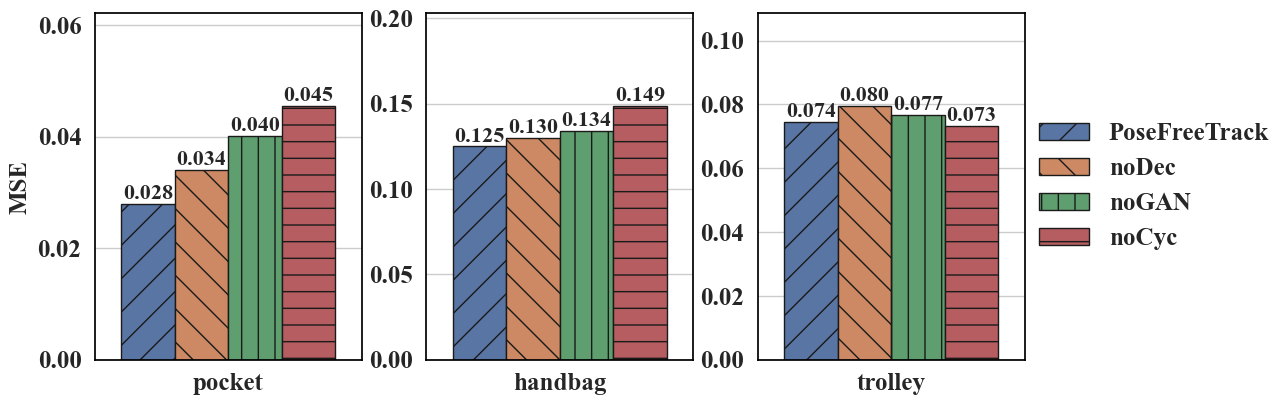

In [16]:
# base' 'flat' 'noAccMStd' 'noCycX' 'noCycZ' 'noDiff' 'noGAN' 'noRec' 'noStd' 'noYawDiff'
# Effect of Domain Std and AccMag

hue_order = ['base', 'noRec', 'noGAN', 'noCyc'] # , 'noAccMStd', 'noStd', 'noYawDiff'

# g=plot_eval_domain(data, hue_order, 'Rho+Psi', 'MSE', loc='upper left')

g=plot_eval_domains(data, hue_order, 'Rho+Psi', 'MSE') # , loc='upper left'
save_fig(g, f'figures/abla_acc')
# plot_eval_domain(data, hue_order, 'Psi', 'MSE of ρ')
# plot_eval_domain(data, hue_order, 'Rho', 'MSE of ψ')

/tmp/ipykernel_26917/2837690949.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


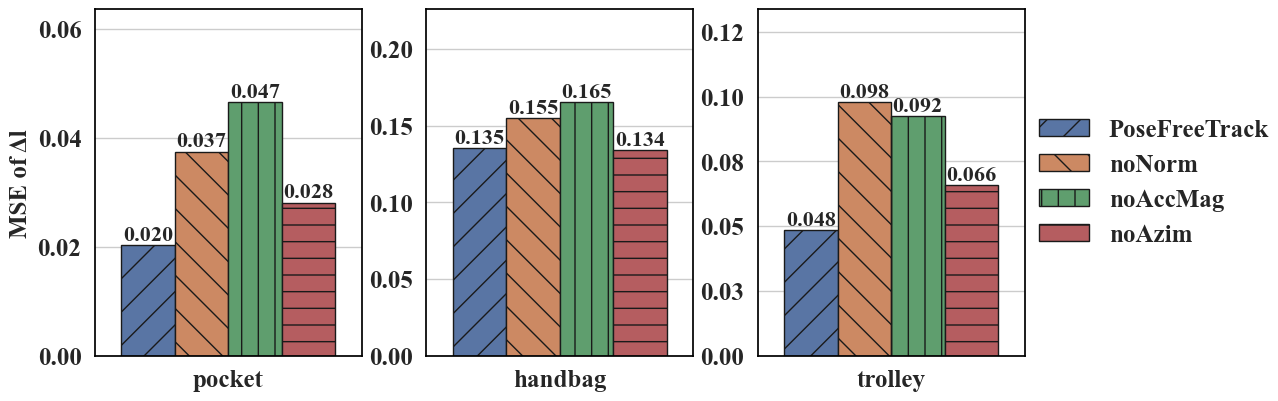

/tmp/ipykernel_26917/2837690949.py:24: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i+1)


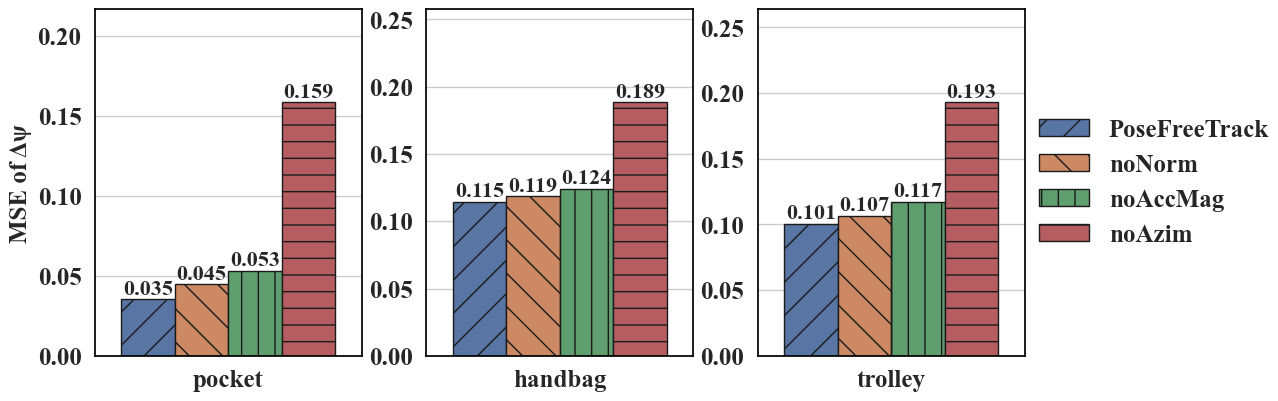

In [20]:
hue_order = ['base', 'noStd', 'noAccMStd', 'noYawDiff'] # , 'noAccMStd', 'noStd', 'noYawDiff'

def save_plt_fig(fig_name):
    plt.savefig(f'{fig_name}.png', bbox_inches='tight')
    plt.savefig(f'{fig_name}.pdf', bbox_inches='tight', transparent=True, pad_inches=0)

# plot_eval_domain(data, hue_order, 'Rho+Psi', 'Test MSE')
# plot_eval_domain(data, hue_order, 'Rho', 'Test MSE of ρ', loc='upper left')
# plot_eval_domain(data, hue_order, 'Psi', 'Test MSE of ψ', loc='upper left', ylim=(0, 0.26))
g=plot_eval_domains(data, hue_order, 'Rho', 'MSE of Δl')
save_fig(g, f'figures/eff_ds_acc')
g=plot_eval_domains(data, hue_order, 'Psi', 'MSE of Δψ')
save_fig(g, f'figures/eff_yd_acc')

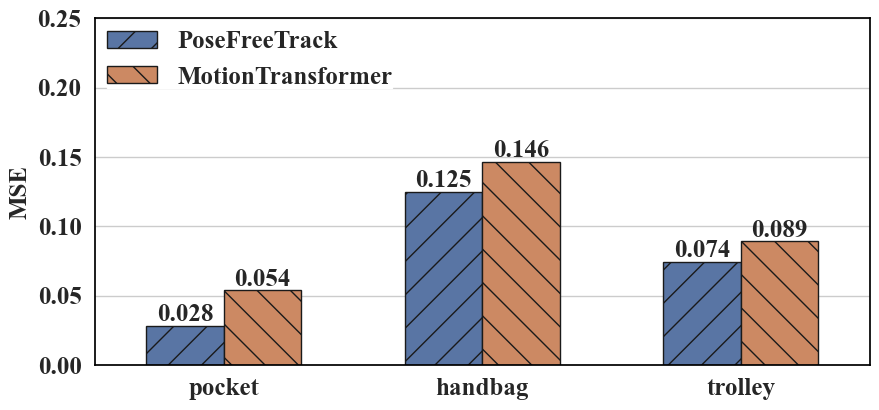

In [21]:
hue_order = ['base', 'mtbase_aug'] # , 'mtbase', 'noAccMStd', 'noStd', 'noYawDiff'

g = plot_eval_domain(data, hue_order, 'Rho+Psi', 'MSE', loc='upper left', ylim=(0, 0.24), domains=['pocket', 'handbag', 'trolley'], width=0.6)
save_fig(g, f'figures/cmp_acc')
# plot_eval_domains(data, hue_order, 'Rho+Psi', 'Test MSE')
# plot_eval_domain(data, hue_order, 'Psi', 'Test MSE of ρ')
# plot_eval_domain(data, hue_order, 'Rho', 'Test MSE of ψ')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


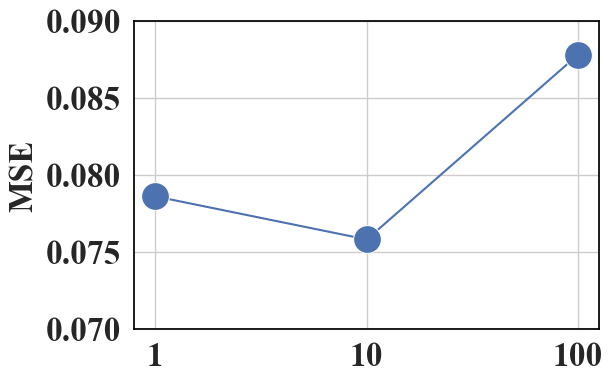

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


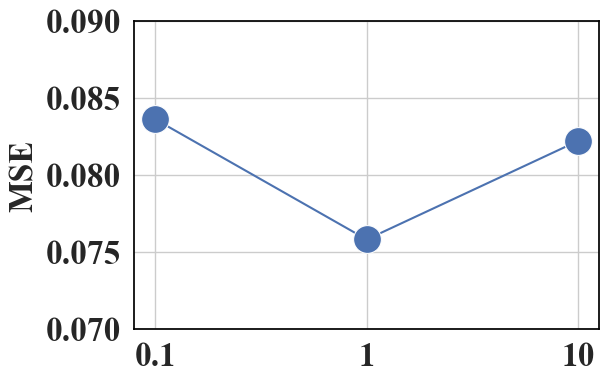

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


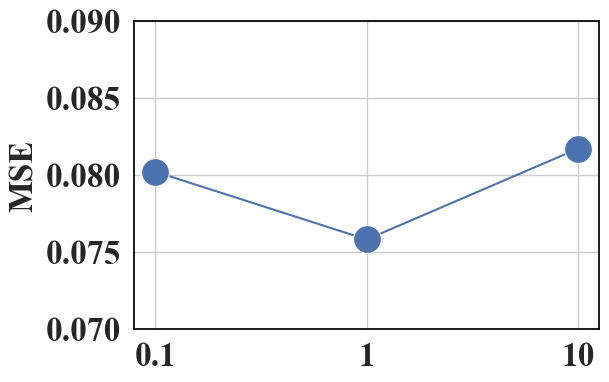

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


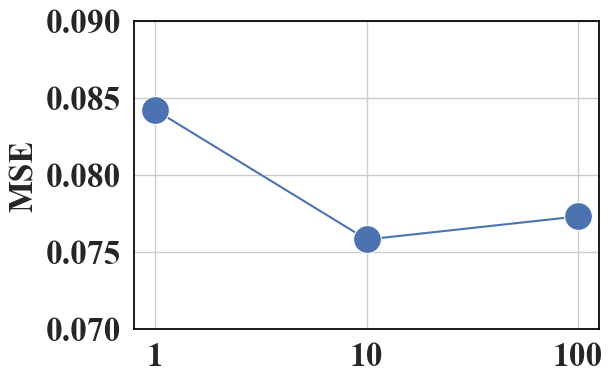

In [22]:
def plot_param(data, hue_order, var_order, xlabel, ylim=None):
    data = select_df(data_ori, 'method', hue_order)
    data = select_df(data, 'loss_type', 'Rho+Psi')
    data = data.melt(id_vars=['method', 'name', 'loss_type'], value_vars=['all targets'])
    data['var'] = data['method'].copy()
    data['var'].replace(dict(zip(hue_order, var_order)), inplace=True)
    data = sort_df(data, 'var', dict(zip(var_order, list(range(len(var_order))))))
    # print(data)

    sns.set_context({'figure.figsize':[6, 4]})
    g = sns.lineplot(data, x="var", y="value", marker='o', markers=True, markersize=20)
    set_g(g, 24, xlabel='', ylabel="MSE", ylim=ylim) # , xlabel=xlabel
    plt.legend().remove()
    plt.show()
    return g

setfontsize(24)
g = plot_param(data, ['a_ae/1', 'base','a_ae/100'], ['1', '10', '100'], 'λ$_1$', [0.07, 0.09])
save_fig(g, 'figures/lambda_1')
g = plot_param(data, ['a_gan/0.1', 'base','a_gan/10'], ['0.1', '1', '10'], 'λ$_2$', [0.07, 0.09])
save_fig(g, 'figures/lambda_2')
g = plot_param(data, ['a_cycx/0.1', 'base','a_cycx/10'], ['0.1', '1', '10'], 'λ$_3$', [0.07, 0.09])
save_fig(g, 'figures/lambda_3')
g = plot_param(data, ['a_pred/1', 'base','a_pred/100'], ['1', '10', '100'], 'λ$_4$', [0.07, 0.09])
save_fig(g, 'figures/lambda_4')

# g = plot_param(data, ['a_cycz/0.1', 'base','a_cycz/10'], ['0.1', '1', '10'], 'λ$_2$', [0.07, 0.09])
# save_fig(g, 'figures/lambda_2')